# mom6_bathy
*Grid and Bathymetry generator for simpler MOM6 experiments*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mom6_bathy.mom6grid import mom6grid

## Step 1: Create a cartesian MOM6 grid

In [2]:
# Instantiate a MOM6 grid instance
grd = mom6grid(
        nx         = 360,         # Number of grid points in x direction
        ny         = 180,         # Number of grid points in y direction
        config     = "cartesian", # Grid configuration. Valid values: 'cartesian', 'mercator', 'spherical'
        axis_units = "degrees",   # Grid axis units. Valid values: 'degrees', 'm', 'km'
        lenx       = 360.0,       # grid length in x direction, e.g., 360.0 (degrees)
        leny       = 160.0,       # grid length in y direction
        ystart     = -80.0
)

Updating supergrid...


### Plot grid properties:

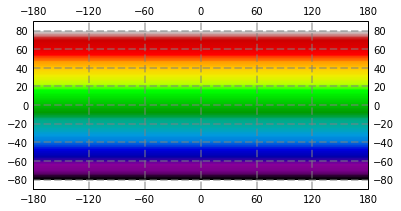

In [3]:
grd.plot('tlat')

## Step 2: Optional Customizations
Note: coordinate manipulations must be applied to the supergrid!

In [4]:
# import midas supergrid class:
from midas.rectgrid_gen import supergrid

In [5]:
# Get the coordinates of the supergrid
super_x  = grd.supergrid.x
super_y  = grd.supergrid.y
super_dy = super_y[1:,0] - super_y[:-1,0]

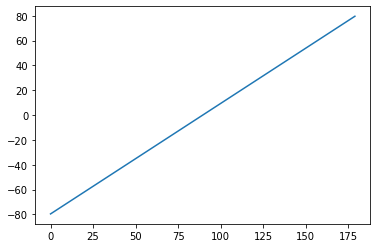

In [6]:
plt.plot(grd.tlat[:,0]);

### Customize the supergrid: increase the meridional resolution by 2x between -30 and +30 deg

In [7]:
from scipy import interpolate

**Refinement function**

In [8]:
f = 0.5
r_y = [-80,-30,-10,10,30,80] # transition latitudes
r_f = [1,1,f,f,1,1]      # inverse refinement factors at transition latitutdes
interp_func = interpolate.interp1d(r_y, r_f, kind=3)
r_f_mapped = interp_func(super_y[1:,0])
r_f_mapped = np.where(r_f_mapped < 1.0, r_f_mapped, 1.0)
r_f_mapped = np.where(r_f_mapped > f, r_f_mapped, f)

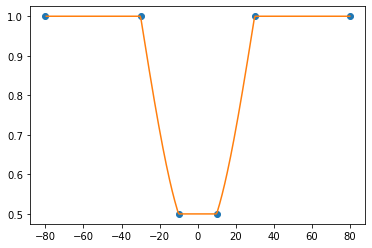

In [9]:
plt.plot(r_y, r_f, 'o', super_y[1:,0], r_f_mapped, '-');

**Compute new supergrid dy and y:**

In [10]:
# the new array of dy and y:
super_dy_new = super_dy.mean() * r_f_mapped / r_f_mapped.mean() # normalize
super_y_new = super_y[:,0].copy()
super_y_new[1:] = super_y[0,0] + super_dy_new.cumsum()

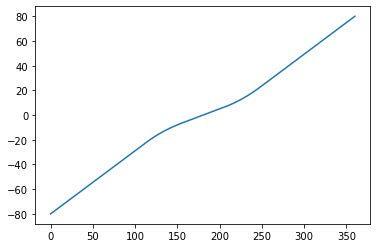

In [11]:
# the new array of y:
plt.plot(super_y_new);

**Update the supergrid**

In [12]:
xdat, ydat = np.meshgrid(super_x[0,:], super_y_new)
grd.update_supergrid(xdat, ydat)

Updating supergrid...


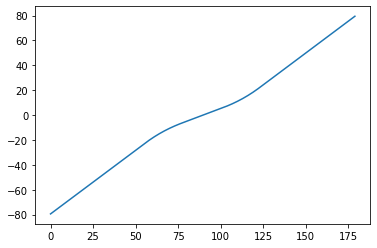

In [13]:
plt.plot(grd.tlat[:,0]);